<a href="https://colab.research.google.com/github/Harini-1003/Phonic-Flux/blob/main/breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  40-49   premeno      15-19       0-2       yes          3  right   
1  50-59      ge40      15-19       0-2        no          1  right   
2  50-59      ge40      35-39       0-2        no          2   left   
3  40-49   premeno      35-39       0-2       yes          3  right   
4  40-49   premeno      30-34    03-May       yes          2   left   

  breast-quad irradiat                 Class  
0     left_up       no     recurrence-events  
1     central       no  no-recurrence-events  
2    left_low       no     recurrence-events  
3    left_low      yes  no-recurrence-events  
4    right_up       no     recurrence-events  
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weig

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


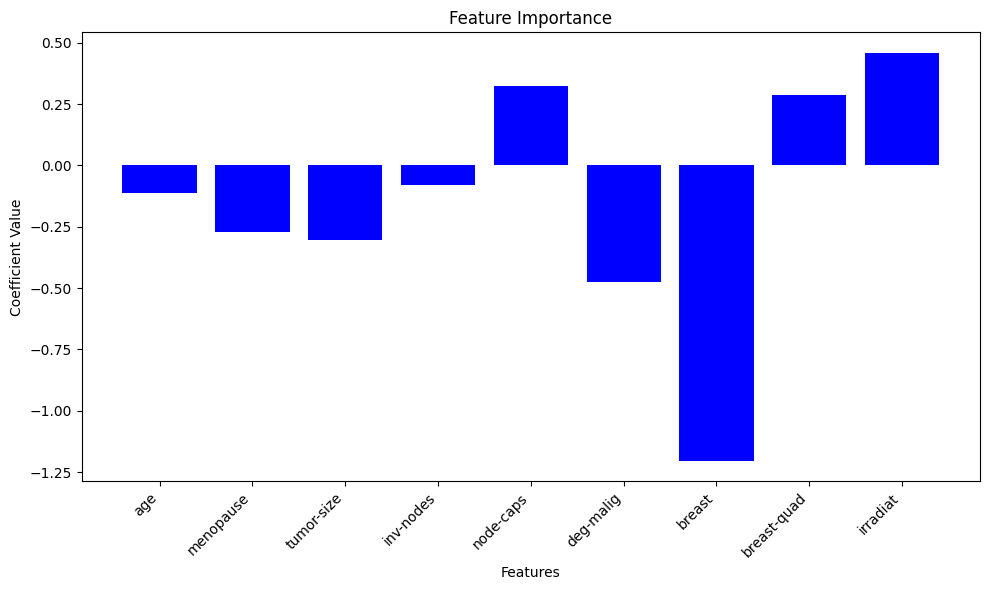

['label_encoders.pkl']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the data (replace 'data.csv' with your actual dataset path)
data = pd.read_csv('/content/breast-cancer_csv.csv')

# Display the first few rows to understand the structure
print(data.head())

# Step 1: Data Preprocessing
# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Create and Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Visualization: Plotting feature importance (coefficients)
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0], color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the model and encoders for future use (if needed)
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')